NOTE: <br>
review link of my proposal: https://review.udacity.com/#!/reviews/1076422

# Machine Learning Engineer Nanodegree

## Capstone Project -- TalkingData AdTracking Fraud Detection Challenge
<br>
<br>
Yoh-Hao Chang <br>
question0802@gmail.com <br>
Mar. 8th, 2018
***

## I. Definition
### Project Overview
Fraud risk is everywhere, but for companies that advertise online, click fraud can happen at an overwhelming volume, resulting in misleading click data and wasted money. Ad channels can drive up costs by simply clicking on the ad at a large scale. With over 1 billion smart mobile devices in active use every month, China is the largest mobile market in the world and therefore suffers from huge volumes of fraudulent traffic. In the paper, ‘Detecting Click Fraud in Online Advertising: A Data Mining Approach’ (JMLR, v.15 n.1, p.99-140, Jan. 2014), it summarize lots of observations and analyses of the fraud click detection. It also addressed some important issues in data mining and machine learning research, including highly imbalanced distribution of the output variable, heterogeneous data (mixture of numerical and categorical variables), and noisy patterns with missing or unknown values. 

TalkingData, China’s largest independent big data service platform, covers over 70% of active mobile devices nationwide. They handle 3 billion clicks per day, of which 90% are potentially fraudulent. Their current approach to prevent click fraud for app developers is to measure the journey of a user’s click across their portfolio, and flag IP addresses who produce lots of clicks, but never end up installing apps. With this information, they’ve built an IP blacklist and device blacklist.

A generous dataset covering approximately 200 million clicks over 4 days is provided for this project. All of the necessary data sets can be found and download from: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

There are about hundreds million recorded data and each data entry is with 8 features. It contains some features like: IP address of click, App. ID for marketing, operation system (OS) version ID of user mobile phone, device type ID of user mobile phone, the target that is to be predicted, indicating the app was downloaded, etc. Some features of data are encoded already. Except of two features are recorded in UTC time format.

Ref: http://www.jmlr.org/papers/volume15/oentaryo14a/oentaryo14a.pdf

### Problem Statement
The problem is quite straightforward: **how to know whether a user will really download an app after clicking a mobile app ad? That is, how to distinguish between meaningful clicks and fraud clicks?** Currently, TalkingData does have some methods to prevent click fraud. But there are still rooms for improvement. While successful, they can then always be one step ahead of those fraudsters. So our goal is to **develop an algorithm/model which can precisely predict whether a user will download an app after clicking a mobile app ad based on the recorded properties of that user**. The performance of model will be evaluated on area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target. The smaller differences between our predictions and truths, the better our solution model will be. Then such model can be used to distinguish between meaningful clicks and fraud clicks and reduced the amount of wasted money caused by fraudulence.

This project is actually taken from one of Kaggle competitions. They provide a benchmark model which is developed by a random forest method. The socre of this benchmark model is 0.911. And the score is exactly evaluated on area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target.

<img src="image/flowchart.jpg" alt="Drawing" style="width: 400px;"/>

By following a very traditional but useful work flow, we first approach this problem by investigating the data. Through this exploratory data analysis, we can establish some basic ideas about the interrelationship between different features or the natural properties of each feature itself. We can even create some new features based on the existing features.

Next, we have to check and clean the data. Maybe sometime our data will contain lots of different values or even missing values. So in feature engineering of data for our model developing, we will handle the problem of missing value and outliers, and/or normalize numeric features. If we have any categorical feature or text format feature, additional data preprocessing techniques will be included. For developing a proper model for our project, we now will split the whole training data set into to three pieces: one for training, another for validation and the other for testing. This step is for cross-validation.

Basically, two kinds of classifiers will be built in this project: one is based on the neural network; the other is based on the random forest. Grid search method will be optional for finding the best combination of model’s parameters. Once we have finished training the models. They will be evaluated by using the evaluation metric, area under the Receiver operating characteristic curve (AUC). Models will be check thoroughly to see if there is anything insufficient. 

Kaggle’s official evaluation will be also taken into account. Depending on the performance of these models, we maybe have to go to some previous step to see if there is anything missing or wrong. Once we have an acceptable model (the one with better
performance on evaluation and testing), whose score is at least over 0.92, we can stop and publish that model.

### Metrics
Evaluation metric will be the area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target. Such metric is also called as ‘AUC’. AUC as a further interpretation of ROC is a very straightforward and easyunderstanding metric of a binary classifier system. Since now we are trying to establish a model to predict whether a user will download an app after clicking a mobile app or not. This is exactly a binary classification problem. Given a threshold parameter $T$, the instance is classified as “positive” if $X>T$, and “negative” otherwise. $X$ follows a probability density $f_{1}(x)$ if the instance actually belongs to class “positive”, and $f_{0}(x)$ if otherwise. Therefore, the true positive rate is given by $TPR(T)=\int_{T}^{\infty}f_{1}(x)dx$ and the false positive rate is given by $FPR(T)=\int_{T}^{\infty}f_{0}(x)dx$. 

The ROC curve plots parametrically $TPR(T)$ versus $FPR(T)$ with $T$ as the varying parameter. Then the AUC is simply the area under the ROC. Generally, we can judge our model through the value of AUC like follows:
- AUC=0.5 (no discrimination)
- 0.7 ≦ AUC ≦ 0.8 (acceptable discrimination)
- 0.8 ≦ AUC ≦ 0.9 (excellent discrimination)
- 0.9 ≦ AUC ≦ 1.0 (outstanding discrimination)

Ref: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
***

## II. Analysis
### Data Exploration
Input training data can be download from: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data
- **train.csv** - the training set
- **train_sample.csv** - 100,000 randomly-selected rows of training data, to inspect data before downloading full set
- **test.csv** - the test set for Kaggle Leaderboard ranking

In [38]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# full data
size_data = [0, 0]
for chunk in pd.read_csv('data/train.csv', chunksize=1000000, iterator=True):
    size_data[0] += chunk.shape[0]
    size_data[1] = chunk.shape[1]
print "The size of data is {} entries x {} features".format(size_data[0], size_data[1])

The size of data is 184903890 entries x 8 features


In [39]:
sample_data = pd.read_csv('data/train_sample.csv') # sample data
display(sample_data.head())

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [40]:
test_data_kaggle = pd.read_csv('data/test.csv') # test data for kaggle leaderboard
display(test_data_kaggle.head())

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


The size of the data (train.csv) is really quite big. It maybe takes much time use the whole training data set and the whole testing data set for our model development and self-evaluation due to limited memory. There are **184903890** data entries and each data entry is with **8** features. It contains some features like: IP address of click, App. ID for marketing, operation system (OS) version ID of user mobile phone, device type ID of user mobile phone, the target that is to be predicted, indicating the app was downloaded, etc. Some features of data are encoded already. Except of two features are recorded in UTC time format. There is a data sample (train_sample.csv) provided for quick inspection.

Each row of the training data contains a click record, with the following features.
- **ip**: ip address of click.
- **app**: app id for marketing.
- **device**: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- **os**: os version id of user mobile phone
- **channel**: channel id of mobile ad publisher
- **click_time**: timestamp of click (UTC)
- **attributed_time**: if user download the app for after clicking an ad, this is the time of the app download 

Note that ip, app, device, os, and channel are encoded because these are sensitive data. Although we maybe will loss some useful  informance here.

The test data for Kaggle Leaderboard ranking is similar, with the following differences: <br>
- **click_id**: reference for making predictions

**Target Variable**
- **is_attributed**: the target that is to be predicted, indicating the app was downloaded (not included in the test data for Kaggle Leaderboard ranking)

Next, we start to dig into the data by investigating the distributions or properties of different features. Because the size of train.csv is too large, the train_sample.csv, 100,000 randomly-selected rows of training data, will be much more suitable for us to inspect data. For the rest part of this section, all the results are based on this 100,000 data sample.

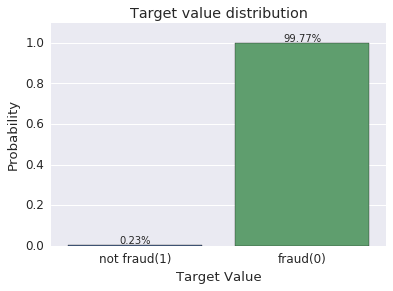

In [41]:
# full data
#num_fraud = 0
#num_not_fraud = 0
#for chunk in pd.read_csv('data/train.csv', chunksize=1000000, iterator=True):
#    num_fraud += chunk[chunk['is_attributed']==0].shape[0]
#    num_not_fraud += chunk[chunk['is_attributed']==1].shape[0]

# sample data
num_fraud = sample_data[sample_data['is_attributed']==0].shape[0]
num_not_fraud = sample_data[sample_data['is_attributed']==1].shape[0]

prob_not_fraud = float(num_not_fraud) / float(num_not_fraud + num_fraud)
prob_fraud = float(num_fraud) / float(num_not_fraud + num_fraud)
ax = sns.barplot(x=['not fraud(1)', 'fraud(0)'], y=[prob_not_fraud, prob_fraud])
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
ax.set_ylim(0, 1.1)
for p, uniq in zip(ax.patches, [prob_not_fraud, prob_fraud]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.01,
            '{}%'.format(round(uniq * 100, 2)), ha="center") 

After a quick check of target value distribution as shown above, we do have a extremely imbalanced dataset. About 99.77% of the dataset are labeled as fraud click and only about 0.23% are not fraud click. Hence, we maybe need to include some data re-sampling strategies for handling this imbalanced label distribution.

In [42]:
checklist = ['ip', 'app', 'device', 'os', 'channel']
dict_feature = dict()
for feature in checklist:
    dict_feature[feature] = set([])

## full data
#for chunk in pd.read_csv('data/train.csv', chunksize=1000000, iterator=True):
#    for feature in dict_feature.keys():
#        dict_feature[feature] = \
#            dict_feature[feature].union(set(chunk.groupby(feature).count().index))

# sample data
for feature in dict_feature.keys():
    dict_feature[feature] = \
        dict_feature[feature].union(set(sample_data.groupby(feature).count().index))

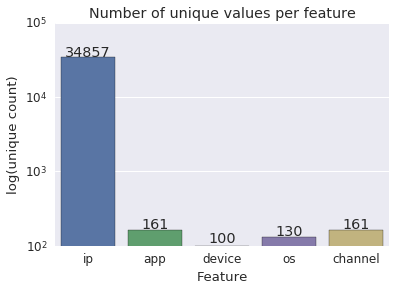

In [43]:
unique = []
for feature in checklist:
    unique.append(len(dict_feature[feature]))

sns.set(font_scale=1.2)
ax = sns.barplot(checklist, unique, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, unique):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10,
            uniq, ha="center") 

From the above histogram, we can know that the except of the feature 'ip', which has the most categories, 34857, the other features like 'app', 'device', 'os', and 'channel' only have about hundreds or thousands categories. This is quite consistent with our understanding of the meaning of these feature in the real world. 

The IP address can be IPv4 or IPv6. An IPv4 address has a size of 32 bits. IPv4 addresses are usually represented in dot-decimal notation, consisting of four decimal numbers, each ranging from 0 to 255, separated by dots, e.g., 172.16.254.1. IPv6 is a more complicated format of IP address in order to provide more addresses. The IP address is unique for eack device which is connected to the internet. If two devices are connecting to the internet in the same time, they definitely won't use the same IP address.

The 'app' feature means the mobile applications which users are using to access some kinds of products. From my point of view, not all kinds of mobile applications will access some specific products. So it's quite reasonable that there are only hundreds of them are included here. The 'device' feature is the device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.). There are also lots of brands on the market and Each brand normally will sell many kinds of mobiles year by year. The 'os' feature stands for the OS version of user mobile phone. Roughly, there are mainly two kind of operation systems of mobile phone, iOS and Android. There are also branches and subversion of them. Each mobile company will sometime develop their own operation system based on the iOS or Android. The 'channel' feature stands for the channel ID of mobile ad publisher. Maybe there are lots of mobile ad publishers in China. but 200 is a reasonable number of mobile ad publishers that one product are correlated with.

Ref: https://en.wikipedia.org/wiki/IP_address

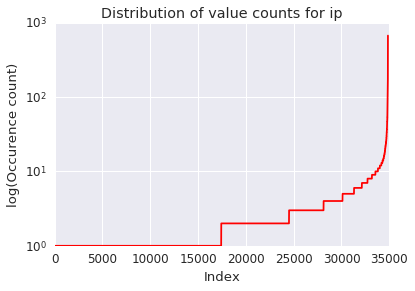

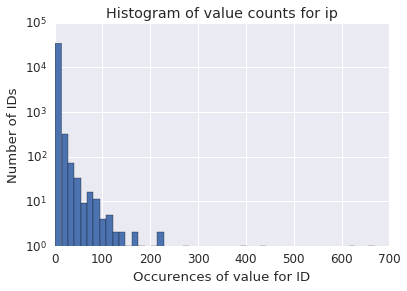

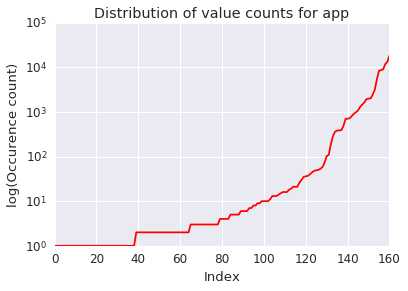

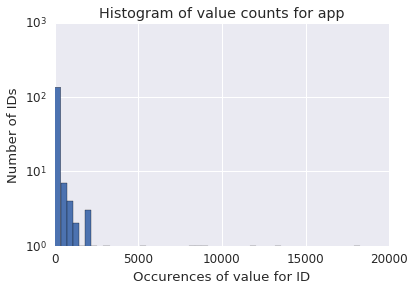

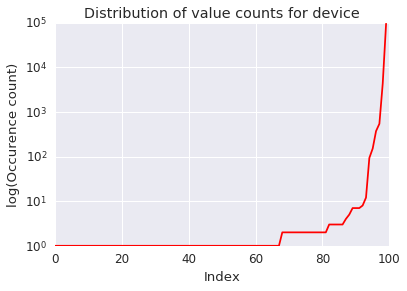

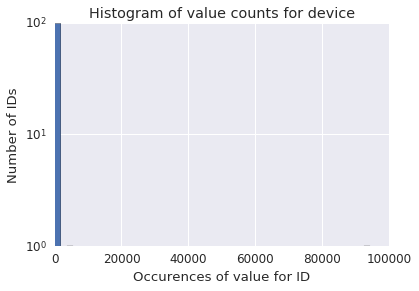

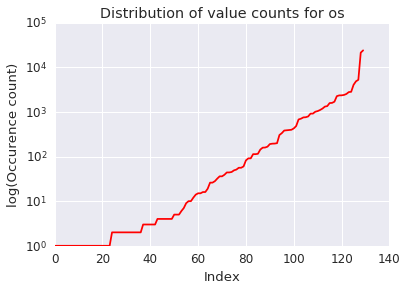

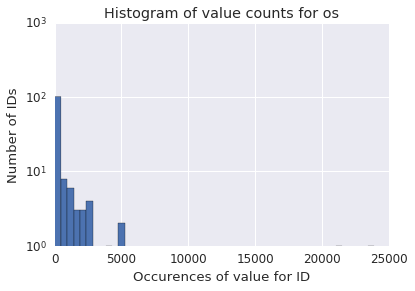

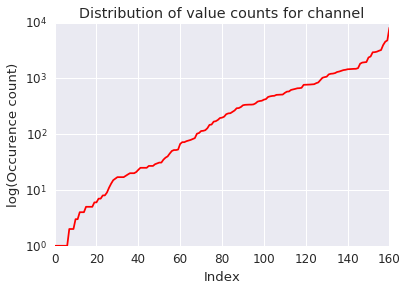

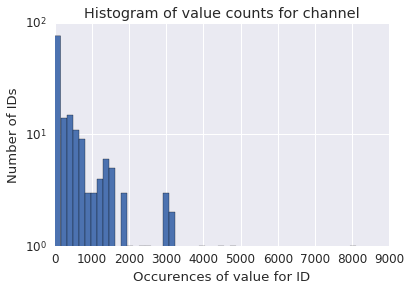

In [45]:
uniques = [len(sample_data[feature].unique()) for feature in checklist]
for col, uniq in zip(checklist, uniques):
    counts = sample_data[col].value_counts()

    sorted_counts = np.sort(counts.values)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(sorted_counts, color='red')
    ax.set_yscale('log')
    plt.title("Distribution of value counts for {}".format(col))
    plt.ylabel('log(Occurence count)')
    plt.xlabel('Index')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(sorted_counts, bins=50)
    ax.set_yscale('log', nonposy='clip')
    plt.title("Histogram of value counts for {}".format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()
    
    max_count = np.max(counts)
    min_count = np.min(counts)
    gt = [10, 100, 1000]
    prop_gt = []
    for value in gt:
        prop_gt.append(round((counts > value).mean()*100, 2))

discrete categorical values